In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from termcolor import colored
from IPython.display import display, HTML

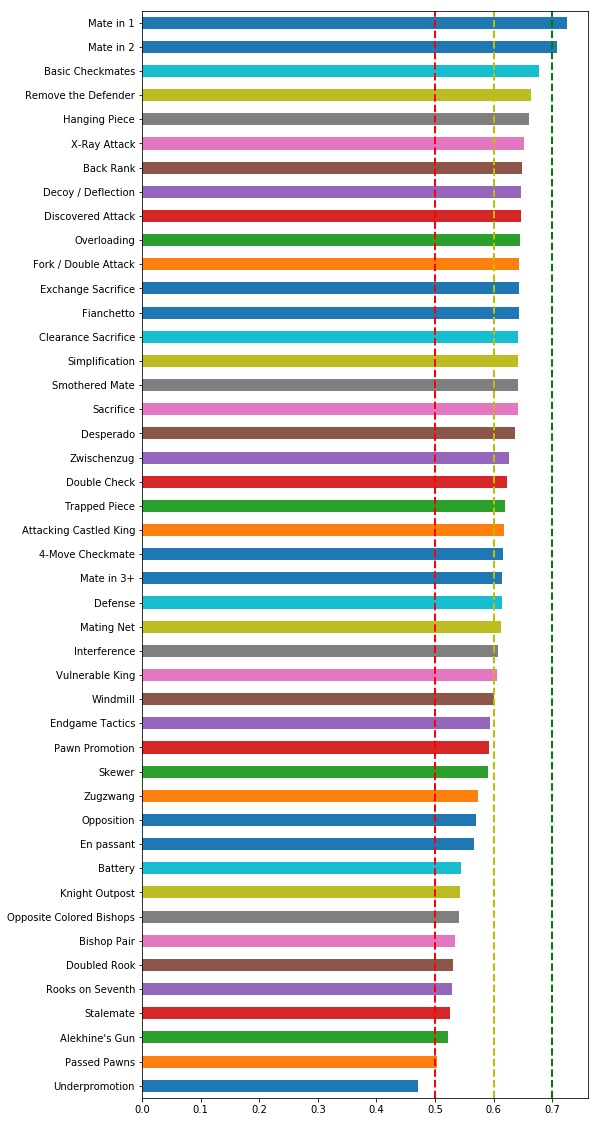

In [2]:
i = 2
df = pd.read_csv('my_data.csv')
while i < 98:
    combinedName = df.columns[i][:-7]
    df[combinedName] = df.iloc[:,i] / (df.iloc[:,i] + df.iloc[:,i+1]) 
    df[combinedName] = df[combinedName].replace([np.inf, -np.inf], np.nan)
    i = i + 2



aggregateRatios = df.iloc[:,98:].aggregate(np.mean)
aggregateRatios= aggregateRatios.sort_values()

aggregateRatios.plot.barh(figsize = (8,20))
plt.axvline(.5, color='r', linestyle='dashed', linewidth=2) 
plt.axvline(.6, color='y', linestyle='dashed', linewidth=2)
plt.axvline(.7, color='g', linestyle='dashed', linewidth=2)

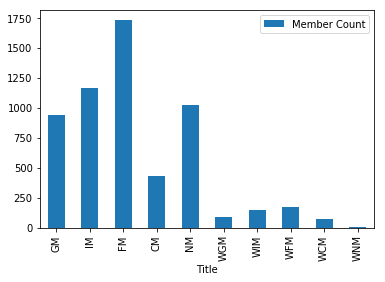

In [3]:
groupMembership = pd.DataFrame(df.groupby('Title')['Title'].count(), index = ["GM", "IM", "FM", "CM", "NM","WGM", "WIM", "WFM", "WCM", "WNM"])
groupMembership.index.name = 'Title'
groupMembership.columns = ['Member Count']
groupMembership.plot.bar()

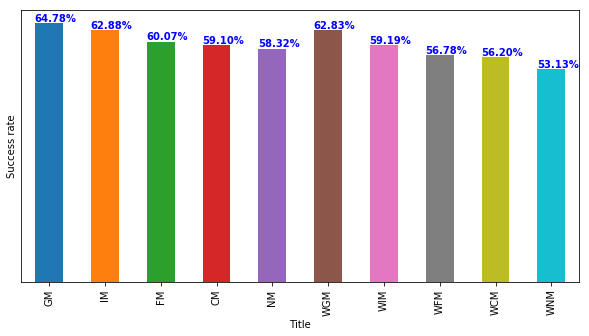

In [4]:
groupedMasters = pd.DataFrame(df.groupby('Title').aggregate(np.mean), index = ["GM", "IM", "FM", "CM", "NM","WGM", "WIM", "WFM", "WCM", "WNM"])
groupedMastersRatios = groupedMasters.iloc[:,96:].aggregate(np.mean, axis = 1)
groupedMastersRatios.index.name = 'Title'
groupedMastersRatios.plot.bar(figsize=(10,5))
plt.ylabel("Success rate")
plt.yticks([])
for i, v in enumerate(groupedMastersRatios):
    plt.text(i-.26, v +.005 , str(v)[2:4]+ "." + str(v)[4:6] + "%", color='blue', fontweight='bold')

In [6]:
groupedData = groupedMasters.iloc[:,96:]

cmtofm = pd.DataFrame(groupedData.loc['FM'] - groupedData.loc['CM'])
cmtofm.name = 'Changes between Candidate Master and FIDE Master'
fmtoim = pd.DataFrame(groupedData.loc['IM'] - groupedData.loc['FM'])
fmtoim.name = 'Changes between FIDE Master and  International Master'
imtogm = pd.DataFrame(groupedData.loc['GM'] - groupedData.loc['IM'])
imtogm.name = 'Changes between International Master and Grandmaster'
cmtogm = pd.DataFrame(groupedData.loc['GM'] - groupedData.loc['CM'])
cmtogm.name = 'Changes between Candidate Master and Grandmaster'

differenceArray = [cmtofm, fmtoim, imtogm, cmtogm]

for dataList in differenceArray:
    print(dataList.name)
    changes = (dataList[0] - dataList[0].mean()) / dataList[0].std(ddof=0)
    changes= pd.DataFrame(changes.sort_values(ascending = False))
    changes.columns = ['Z-Score']
    display(HTML(changes.to_html()))
    print('Deteriorations')
    decreases = (dataList[dataList[0] < 0][0] - dataList[0].mean()) / dataList[0].std(ddof=0)
    decreases = pd.DataFrame(decreases.sort_values())
    decreases.columns = ['Z-Score']
    display(HTML(decreases.to_html()))


Changes between Candidate Master and FIDE Master


,Z-Score
Alekhine's Gun,2.596523
Opposition,1.337823
Battery,1.286294
Mate in 1,1.001704
Basic Checkmates,0.976921
Double Check,0.917329
Hanging Piece,0.713078
Zwischenzug,0.709383
Desperado,0.626102
Zugzwang,0.564745


Deteriorations


,Z-Score
Doubled Rook,-2.920298
Passed Pawns,-2.803181
Knight Outpost,-2.172638
Rooks on Seventh,-1.619301
Opposite Colored Bishops,-1.364194
Bishop Pair,-1.235718
Smothered Mate,-0.579820


Changes between FIDE Master and  International Master


,Z-Score
Alekhine's Gun,5.076325
Fianchetto,1.795007
Underpromotion,0.897564
Opposite Colored Bishops,0.766180
Stalemate,0.617338
Windmill,0.595937
X-Ray Attack,0.566217
Pawn Promotion,0.490670
Interference,0.369764
Endgame Tactics,0.359798


Deteriorations


,Z-Score
Knight Outpost,-1.775464
Opposition,-1.630492


Changes between International Master and Grandmaster


,Z-Score
Stalemate,1.949594
Fianchetto,1.884582
Zugzwang,1.443989
Underpromotion,1.408610
Double Check,1.047236
Interference,0.876088
En passant,0.868815
Smothered Mate,0.791200
Pawn Promotion,0.762959
Sacrifice,0.680011


Deteriorations


,Z-Score
Alekhine's Gun,-3.292441
Rooks on Seventh,-2.876030
Windmill,-1.442060
Passed Pawns,-1.185325
Mate in 1,-1.163216
Opposition,-1.125447
Desperado,-0.943993


Changes between Candidate Master and Grandmaster


,Z-Score
Alekhine's Gun,2.299301
Fianchetto,2.000034
Stalemate,1.666825
Underpromotion,1.511950
Zugzwang,1.054905
Double Check,0.895070
Interference,0.660429
Sacrifice,0.613533
Pawn Promotion,0.533038
Endgame Tactics,0.522739


Deteriorations


,Z-Score
Rooks on Seventh,-3.063555
Passed Pawns,-2.211023
Knight Outpost,-2.181971
Bishop Pair,-1.478331
